In [ ]:
import pandas as pd

file_path = 'DailyDelhiClimateTest.csv'
data = pd.read_csv(file_path)
print("Dataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

data = data.dropna()

print("\nKey Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None

Missing Values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Key Statistics:
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.73

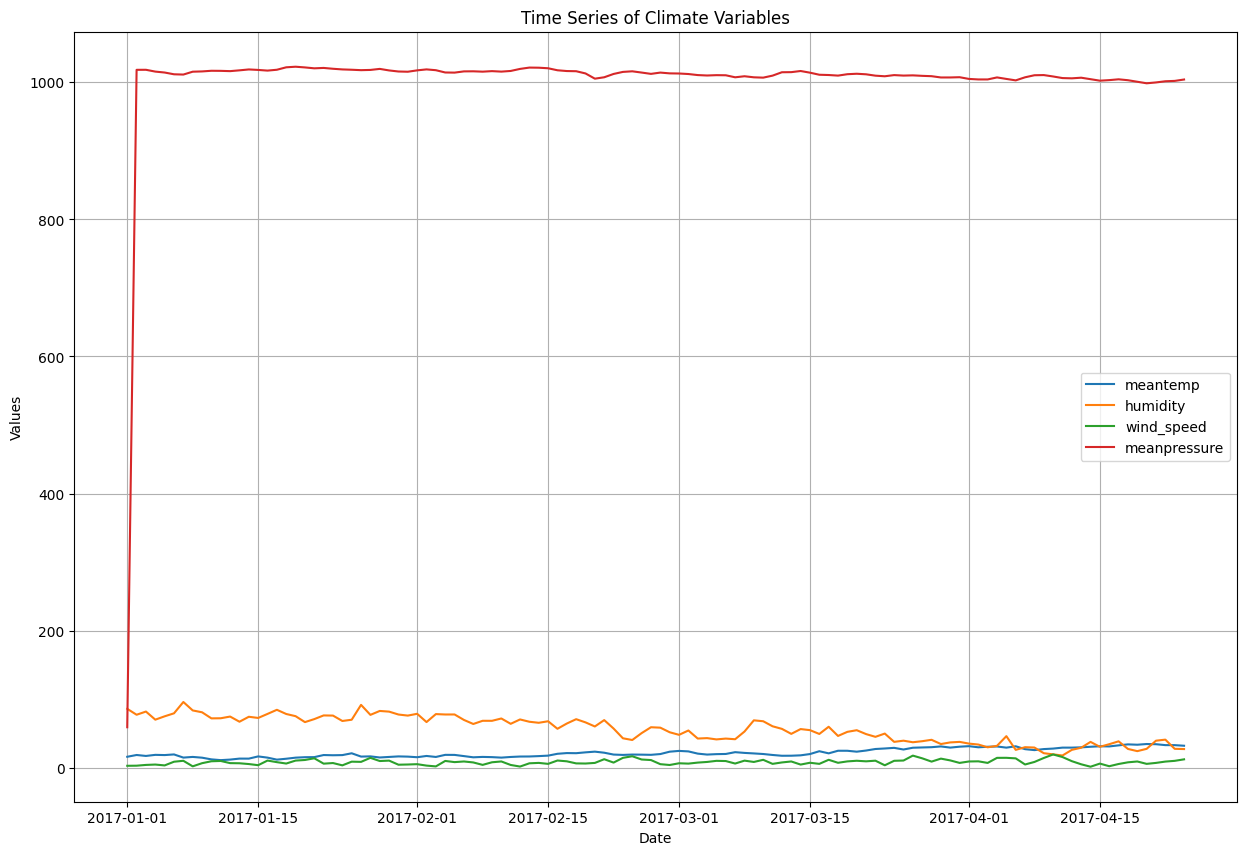

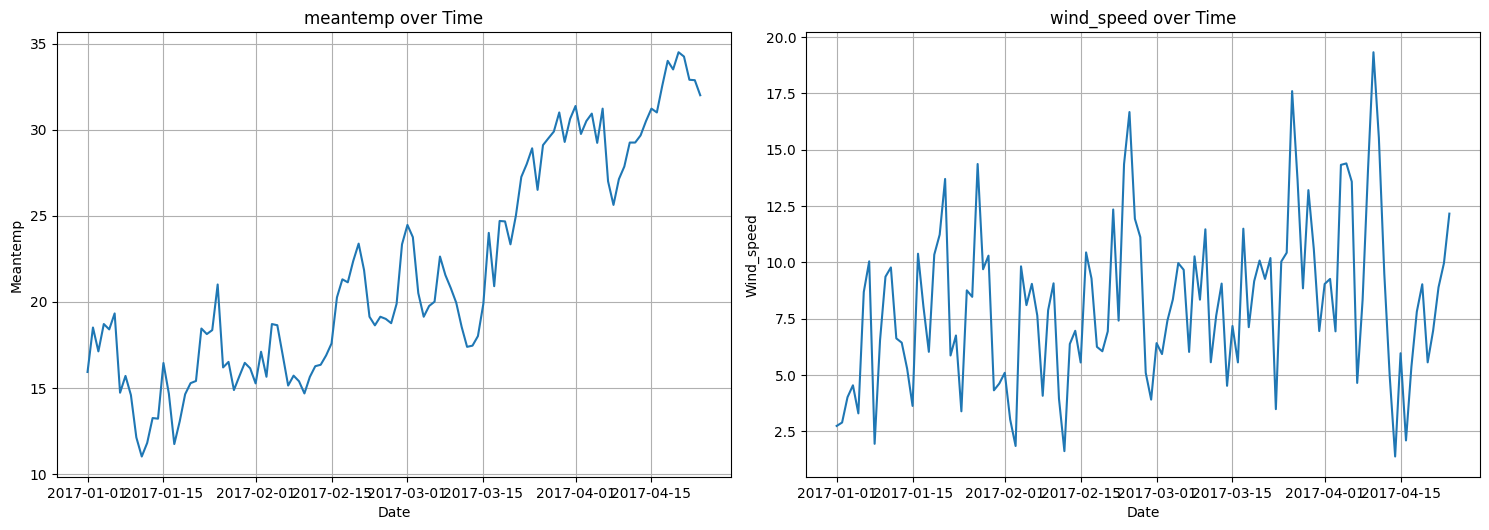

In [ ]:
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(15, 10))
for column in data.columns[1:]:
    plt.plot(data['date'], data[column], label=column)
plt.title('Time Series of Climate Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 10))

columns_to_plot = [c for c in ['meantemp', 'maxtemp', 'mintemp', 'wind_speed'] if c in data.columns]

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    plt.plot(data['date'], data[column], label=column)
    plt.title(f'{column} over Time')
    plt.xlabel('Date')
    plt.ylabel(column.capitalize())
    plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

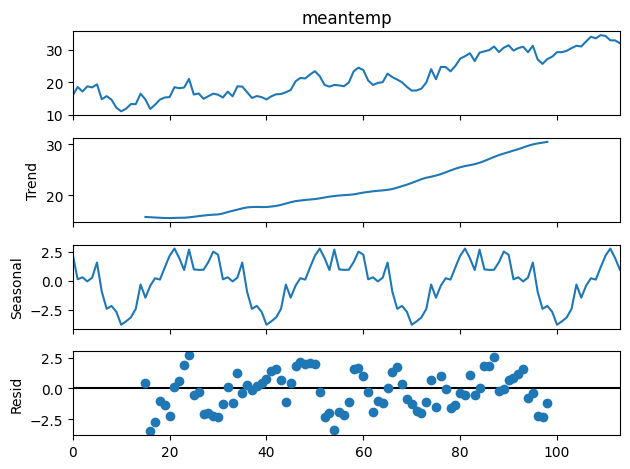

Seasonality:
0    2.244913
1    0.121672
2    0.294799
3   -0.058601
4    0.266658
Name: seasonal, dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['meantemp'], model='additive', period=30)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

print("Seasonality:")
print(decomposition.seasonal.head())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 4.220386173934582
Root Mean Squared Error (RMSE): 4.775506111191262


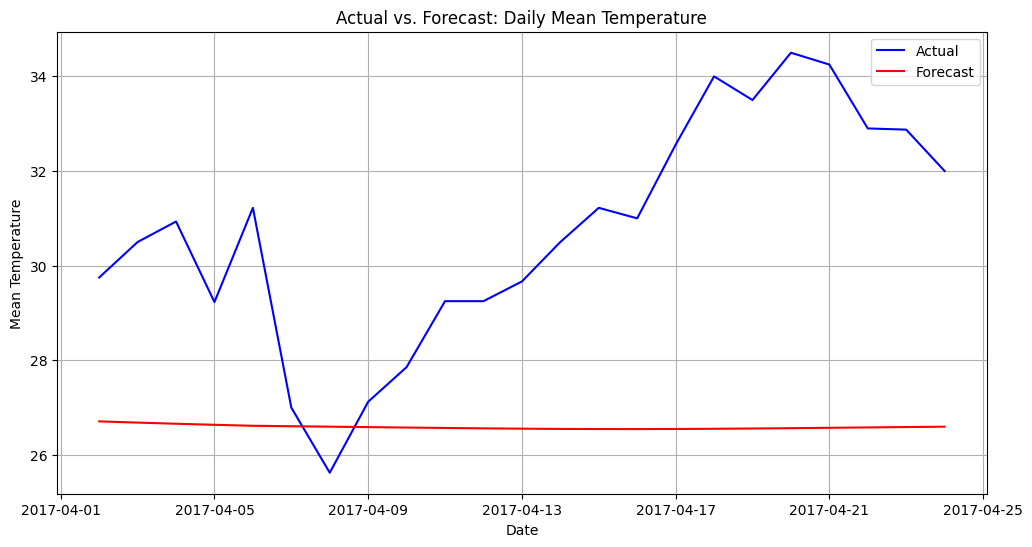

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

train = train.set_index(pd.DatetimeIndex(train['date']))
test = test.set_index(pd.DatetimeIndex(test['date']))

stl = STL(train['meantemp'], seasonal=13, period=30)
result = stl.fit()

model = ExponentialSmoothing(result.trend, seasonal='add', seasonal_periods=30).fit()

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test['meantemp'], forecast)
rmse = np.sqrt(mean_squared_error(test['meantemp'], forecast))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['meantemp'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Actual vs. Forecast: Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True)
plt.show()
